In [1]:
import requests
import pandas as pd
%matplotlib inline
import mplfinance as mpf

In [2]:
apikey='GAVwTDFxk3gZFwVwgnpppDp85ORYwB0z'

# List of symbols you want to fetch data for
symbols = ['AAPL']

# Initialize an empty DataFrame to hold all data
df = pd.DataFrame()

for symbol in symbols:
    # Modify the URL or parameters to fetch data for the current symbol
    url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?apikey={apikey}'
    
    # Making a GET request to the API for the current symbol
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        
        # Assuming the data for each symbol is under a 'historical' key
        # This might need to be adjusted based on the actual structure of the API response
        hdf = pd.DataFrame(data['historical'])
        
        # Add a column for the symbol
        hdf['symbol'] = symbol
        
        # Concatenate the current symbol's data with the overall dataset
        df = pd.concat([df, hdf], ignore_index=True)
    else:
        print(f'Failed to fetch data for {symbol}:', response.status_code)


In [3]:
# df['prevClose'] = df['close'].shift(1)

In [4]:
# df['pct_change'] = df[['open','prevClose']].pct_change(axis=1)['close']

In [5]:
df

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,symbol
0,2024-02-02,179.860,187.330,179.25,185.85,185.85,101096412,100565746,5.990,3.33000,184.73,"February 02, 24",0.033300,AAPL
1,2024-02-01,183.985,186.950,183.82,186.86,186.86,64885408,64885400,2.875,1.56000,185.57,"February 01, 24",0.015600,AAPL
2,2024-01-31,187.040,187.095,184.35,184.40,184.40,55467803,55467800,-2.640,-1.41000,185.35,"January 31, 24",-0.014100,AAPL
3,2024-01-30,190.940,191.800,187.47,188.04,188.04,55836970,55859400,-2.900,-1.52000,188.79,"January 30, 24",-0.015200,AAPL
4,2024-01-29,192.010,192.200,189.58,191.73,191.73,47145622,47145600,-0.280,-0.14583,191.30,"January 29, 24",-0.001458,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2019-02-08,42.250,42.670,42.11,42.60,41.07,95280000,95280000,0.350,0.82840,42.46,"February 08, 19",0.008284,AAPL
1255,2019-02-07,43.100,43.490,42.58,42.74,41.02,126966800,126966800,-0.360,-0.83527,42.94,"February 07, 19",-0.008353,AAPL
1256,2019-02-06,43.660,43.890,43.21,43.56,41.81,112958400,112958400,-0.100,-0.22904,43.56,"February 06, 19",-0.002290,AAPL
1257,2019-02-05,43.220,43.770,43.09,43.54,41.79,144406400,144406400,0.320,0.74040,43.47,"February 05, 19",0.007404,AAPL


In [6]:
df.dtypes

date                 object
open                float64
high                float64
low                 float64
close               float64
adjClose            float64
volume                int64
unadjustedVolume      int64
change              float64
changePercent       float64
vwap                float64
label                object
changeOverTime      float64
symbol               object
dtype: object

In [7]:
df['date'] = pd.to_datetime(df['date'])


In [8]:
df.dtypes

date                datetime64[ns]
open                       float64
high                       float64
low                        float64
close                      float64
adjClose                   float64
volume                       int64
unadjustedVolume             int64
change                     float64
changePercent              float64
vwap                       float64
label                       object
changeOverTime             float64
symbol                      object
dtype: object

In [9]:
df.head(50)

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,symbol
0,2024-02-02,179.860,187.3300,179.2500,185.85,185.85,101096412,100565746,5.990,3.330000,184.73,"February 02, 24",0.033300,AAPL
1,2024-02-01,183.985,186.9500,183.8200,186.86,186.86,64885408,64885400,2.875,1.560000,185.57,"February 01, 24",0.015600,AAPL
2,2024-01-31,187.040,187.0950,184.3500,184.40,184.40,55467803,55467800,-2.640,-1.410000,185.35,"January 31, 24",-0.014100,AAPL
3,2024-01-30,190.940,191.8000,187.4700,188.04,188.04,55836970,55859400,-2.900,-1.520000,188.79,"January 30, 24",-0.015200,AAPL
4,2024-01-29,192.010,192.2000,189.5800,191.73,191.73,47145622,47145600,-0.280,-0.145830,191.30,"January 29, 24",-0.001458,AAPL
5,2024-01-26,194.270,194.7600,191.9400,192.42,192.42,44587111,44594000,-1.850,-0.952280,193.12,"January 26, 24",-0.009523,AAPL
6,2024-01-25,195.220,196.2675,193.1125,194.17,194.17,54822126,54822100,-1.050,-0.537850,194.73,"January 25, 24",-0.005378,AAPL
7,2024-01-24,195.420,196.3800,194.3400,194.50,194.50,53631316,53631300,-0.920,-0.470780,195.21,"January 24, 24",-0.004708,AAPL
8,2024-01-23,195.020,195.7500,193.8299,195.18,195.18,42355590,42355600,0.160,0.082043,194.82,"January 23, 24",0.000820,AAPL
9,2024-01-22,192.300,195.3300,192.2600,193.89,193.89,60131852,60133900,1.590,0.826830,193.99,"January 22, 24",0.008268,AAPL


In [10]:
filtered = df.copy()
filtered.set_index('date', inplace=True)

In [11]:
filt = (filtered.index.to_series() >= pd.to_datetime('2023-01-01'))
filtered = filtered[filt]

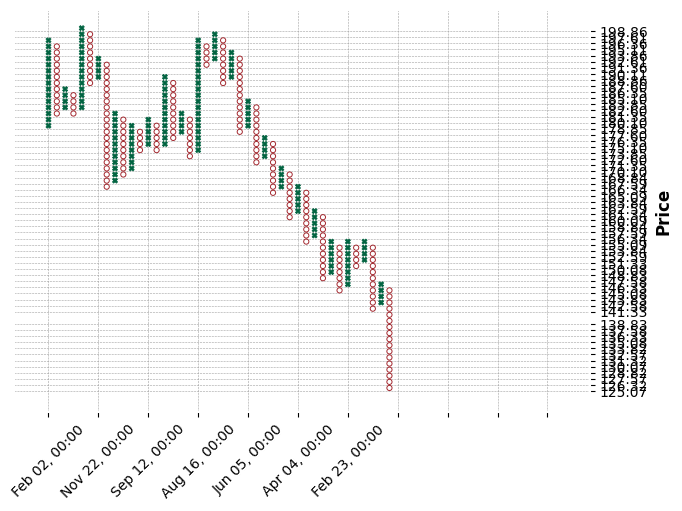

In [12]:
mpf.plot(filtered, type='pnf', style='charles', pnf_params=dict(box_size='1%'))

In [13]:
aggregation = {'open'  :'first',
               'high'  :'max',
               'low'   :'min',
               'close' :'last',
               'volume':'sum'}
df2d = df.resample('2B', on='date').agg(aggregation)

In [14]:
df2d.head(50)

,open,high,low,close,volume
date,,,,,
2019-02-04,41.85,43.77,41.82,43.54,270388400
2019-02-06,43.66,43.89,42.58,42.74,239925200
2019-02-08,42.25,42.80,42.11,42.36,179253600
2019-02-12,42.53,43.12,42.42,42.54,179094800
2019-02-14,42.43,42.92,42.35,42.61,185850000
2019-02-18,42.43,42.86,42.37,42.73,75891200
2019-02-20,42.80,43.33,42.58,42.76,173456400
2019-02-22,42.90,43.97,42.85,43.56,163146400
2019-02-26,43.43,43.83,43.18,43.72,179622400


In [15]:
filt = (df2d.index.to_series().dt.year.isin([2024]))
filtered = df2d[filt]

In [16]:
filtered

,open,high,low,close,volume
date,,,,,
2024-01-01,187.15,188.4400,183.8850,185.64,81964874
2024-01-03,184.22,185.8800,180.8800,181.91,130293130
2024-01-05,181.99,185.6000,180.1700,185.56,121515631
2024-01-09,183.92,186.4000,182.7300,186.19,89034717
2024-01-11,186.54,187.0500,183.6200,185.92,89606190
2024-01-15,182.16,184.2600,180.9340,183.63,65076641
2024-01-17,181.27,189.1400,180.3000,188.63,125040187
2024-01-19,189.33,195.3300,188.8200,193.89,129019837
2024-01-23,195.02,196.3800,193.8299,194.50,95986906


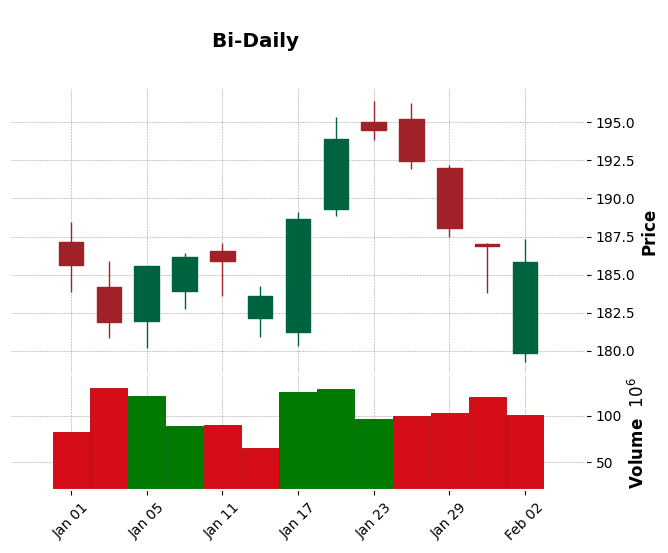

In [17]:
kwargs=dict(volume=True,type='candle',style='charles')
mpf.plot(filtered,**kwargs,title='\nBi-Daily   ')